<a href="https://colab.research.google.com/github/Maicken052/MACC/blob/main/ML_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***ML Supervisado - clasificación:***
## Aprendizaje automático de máquina - Universidad del Rosario
### Samuel Fernando De Dios Pérez <br> Robert Daniel Fonseca Lesmez <br> Escuela de Ingeniería, Ciencia y Tecnología

## **Librerias a usar**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf

from sklearn.preprocessing import StandardScaler #preprosesamiento de datos
from sklearn.model_selection import train_test_split #entrenar los datos
from sklearn.linear_model import LinearRegression #hacer la regresion
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score #usar las metricas de errores, para verificar que los datos estan bien
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_text, plot_tree
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve, auc
from sklearn.manifold import TSNE
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

from tensorflow import keras
from keras import layers, models

## **Importar el dataset**

In [ ]:
data_ori=pd.read_csv('/content/Colesterol.csv')
data=data_ori.copy()

## **Preprocesamiento de los datos**




In [ ]:
print(data.isnull().sum(), '\n') #Revisar la cantidad de datos nulos

Edad          0
Sexo          0
PS            0
Na            0
K             0
Droga         0
Colesterol    0
dtype: int64 



Como no hay datos nulos, dejamos las filas como están

In [ ]:
data.info() #Información de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edad        200 non-null    int64 
 1   Sexo        200 non-null    object
 2   PS          200 non-null    object
 3   Na          200 non-null    object
 4   K           200 non-null    object
 5   Droga       200 non-null    object
 6   Colesterol  200 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.1+ KB


In [ ]:
print(f'Número de filas: {data.shape[0]}, Número de columnas: {data.shape[1]}') #Número de filas y columnas
data.head() #Visualización del dataset

Número de filas: 200, Número de columnas: 7


,Edad,Sexo,PS,Na,K,Droga,Colesterol
0,23,F,ALTO,"0,792535","0,031258",drogaY,ALTO
1,47,M,BAJO,"0,739309","0,056468",drogaC,ALTO
2,47,M,BAJO,"0,697269","0,068944",drogaC,ALTO
3,28,F,NORMAL,"0,563682","0,072289",drogaX,ALTO
4,61,F,BAJO,"0,559294","0,030998",drogaY,ALTO


Tenemos una baja cantidad de filas, así que podemos sospechar que habrán problemas a la hora de entrenar el modelo (sesgos en la cantidad de positivos o negativos)

In [ ]:
print(data.nunique()) #Diferentes tipos de valores por columna

Edad           57
Sexo            2
PS              3
Na            200
K             200
Droga           5
Colesterol      2
dtype: int64


Se dummifican las variables categóricas y se cambia de datos booleanos a números.

In [ ]:
data = pd.get_dummies(data, columns=['Sexo'], prefix='Sexo')
data = pd.get_dummies(data, columns=['PS'], prefix='PS')
data = pd.get_dummies(data, columns=['Droga'], prefix='Droga')

data['Sexo_F'] = data['Sexo_F'].replace({True: 1, False: 0}).astype(int)
data['Sexo_M'] = data['Sexo_M'].replace({True: 1, False: 0}).astype(int)
data['PS_ALTO'] = data['PS_ALTO'].replace({True: 1, False: 0}).astype(int)
data['PS_BAJO'] = data['PS_BAJO'].replace({True: 1, False: 0}).astype(int)
data['PS_NORMAL'] = data['PS_NORMAL'].replace({True: 1, False: 0}).astype(int)
data['Droga_drogaA'] = data['Droga_drogaA'].replace({True: 1, False: 0}).astype(int)
data['Droga_drogaB'] = data['Droga_drogaB'].replace({True: 1, False: 0}).astype(int)
data['Droga_drogaC'] = data['Droga_drogaC'].replace({True: 1, False: 0}).astype(int)
data['Droga_drogaX'] = data['Droga_drogaX'].replace({True: 1, False: 0}).astype(int)
data['Droga_drogaY'] = data['Droga_drogaY'].replace({True: 1, False: 0}).astype(int)
data['Colesterol'] = data['Colesterol'].replace({'ALTO': 1, 'NORMAL': 0}).astype(int)

Como las columnas 'Na' y 'K' están como strings, se pasan a valores numéricos

In [ ]:
numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

for column in data.columns:
  for value in data[column]:
    if type(value) == str:
      if value[0] in numbers:
        data[column] = data[column].str.replace(',', '.').astype(float)
    break

In [ ]:
data.info() #Información de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Edad          200 non-null    int64  
 1   Na            200 non-null    float64
 2   K             200 non-null    float64
 3   Colesterol    200 non-null    int64  
 4   Sexo_F        200 non-null    int64  
 5   Sexo_M        200 non-null    int64  
 6   PS_ALTO       200 non-null    int64  
 7   PS_BAJO       200 non-null    int64  
 8   PS_NORMAL     200 non-null    int64  
 9   Droga_drogaA  200 non-null    int64  
 10  Droga_drogaB  200 non-null    int64  
 11  Droga_drogaC  200 non-null    int64  
 12  Droga_drogaX  200 non-null    int64  
 13  Droga_drogaY  200 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 22.0 KB


In [ ]:
data.describe() #Ver la información completa del dataset

,Edad,Na,K,Colesterol,Sexo_F,Sexo_M,PS_ALTO,PS_BAJO,PS_NORMAL,Droga_drogaA,Droga_drogaB,Droga_drogaC,Droga_drogaX,Droga_drogaY
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000
mean,44.315000,0.697095,0.050174,0.515000,0.480000,0.520000,0.385000,0.320000,0.295000,0.115000,0.080000,0.080000,0.270000,0.45500
std,16.544315,0.118907,0.017611,0.501029,0.500854,0.500854,0.487816,0.467647,0.457187,0.319823,0.271974,0.271974,0.445074,0.49922
min,15.000000,0.500169,0.020022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,31.000000,0.583887,0.035054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,45.000000,0.721853,0.049663,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,58.000000,0.801494,0.066000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000
max,74.000000,0.896056,0.079788,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
#Tipos de datos
categorical_data = data.select_dtypes(include=object)
print(categorical_data.columns)
numeric_data = data.select_dtypes(include=np.number)
print(numeric_data.columns)

Index([], dtype='object')
Index(['Edad', 'Na', 'K', 'Colesterol', 'Sexo_F', 'Sexo_M', 'PS_ALTO',
       'PS_BAJO', 'PS_NORMAL', 'Droga_drogaA', 'Droga_drogaB', 'Droga_drogaC',
       'Droga_drogaX', 'Droga_drogaY'],
      dtype='object')


In [ ]:
data.head()

,Edad,Na,K,Colesterol,Sexo_F,Sexo_M,PS_ALTO,PS_BAJO,PS_NORMAL,Droga_drogaA,Droga_drogaB,Droga_drogaC,Droga_drogaX,Droga_drogaY
0,23,0.792535,0.031258,1,1,0,1,0,0,0,0,0,0,1
1,47,0.739309,0.056468,1,0,1,0,1,0,0,0,1,0,0
2,47,0.697269,0.068944,1,0,1,0,1,0,0,0,1,0,0
3,28,0.563682,0.072289,1,1,0,0,0,1,0,0,0,1,0
4,61,0.559294,0.030998,1,1,0,0,1,0,0,0,0,0,1


Con los cambios realizado anteriormente, podemos observar que todas las variables terminan siendo numéricas, por lo que sirven para entrenar el modelo.

## **Insights**

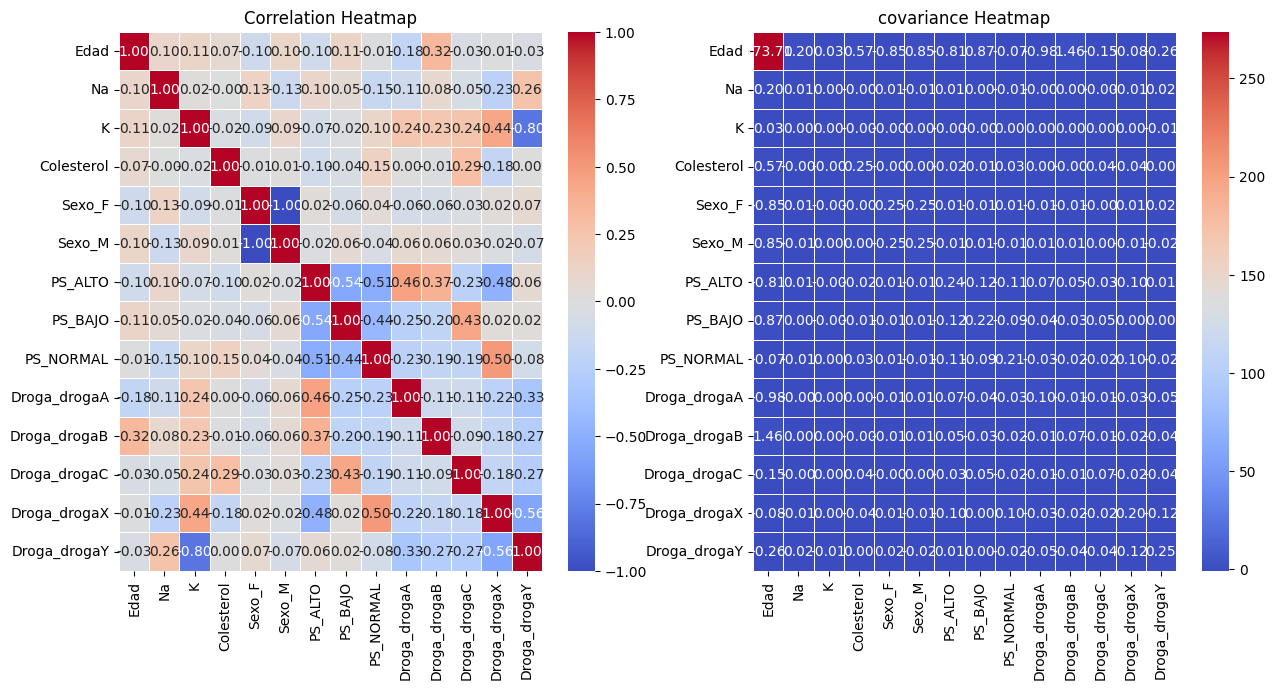

In [ ]:
#Visualización de la matriz de correlación
correlation_matrix = data.corr()
cov_matrix = data.cov()
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

plt.subplot(1,2,2)
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('covariance Heatmap')
plt.show()

No hay correlaciones relevante además de la que hay entre la droga Y y K, y la inversa entre los géneros, lo cuál resulta evidente dado que era una columna binaria.

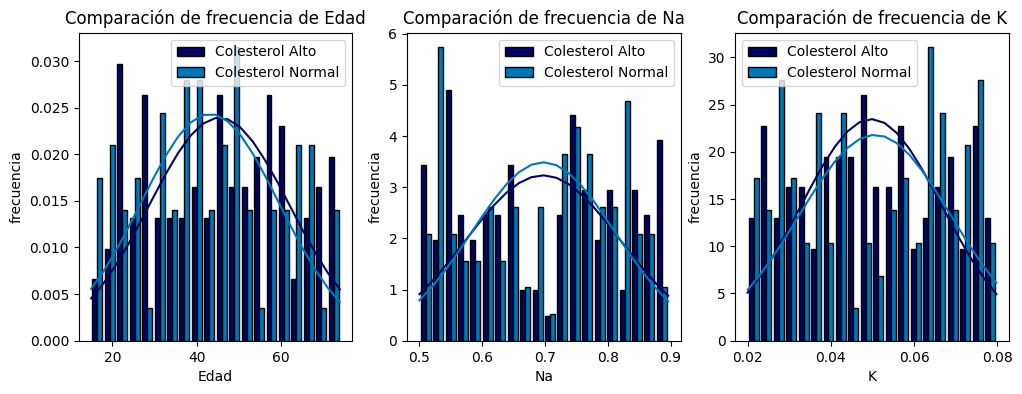

In [ ]:
#Comparar la frecuencia de número de reviews comparando si el host tiene su perfil verificado o no
plt.figure(figsize=(12, 4))

vari=['Edad', 'Na', 'K']
ti  =['Edad', 'Na', 'K']

for num, i in enumerate(vari):
  plt.subplot(1, len(vari), num+1)
  x=[data[data['Colesterol']==1][i], data[data['Colesterol']==0][i]]
  n, bins, patches=plt.hist(x, bins=20, density = True, histtype = "bar", color=["#03045e", "#0077b6"], edgecolor = 'Black', label=['Colesterol Alto','Colesterol Normal'])
  plt.legend(prop={'size': 10})
  sigma1 = x[0].std()
  mu1    = x[0].mean()

  y1 = ((1 / (np.sqrt(2 * np.pi) * sigma1)) *
      np.exp(-0.5 * (1 / sigma1 * (bins - mu1))**2))
  plt.plot(bins, y1, '-', color="#03045e")

  sigma2 = x[1].std()
  mu2    = x[1].mean()

  y2 = ((1 / (np.sqrt(2 * np.pi) * sigma2)) *
      np.exp(-0.5 * (1 / sigma2 * (bins - mu2))**2))
  plt.plot(bins, y2, '-', color="#0077b6")

  plt.title(f'Comparación de frecuencia de {i}')
  plt.ylabel('frecuencia')
  plt.xlabel(f'{ti[num]}')


plt.show()

Podemos ver que las variables numéricas se distribuyen de manera aproimadamente normal, excepto en la cantidad de Gente con Na = 0.7, siendo la menor de todas las tasas de Na, mientras que la mayor es entre 0.5 y 0.6

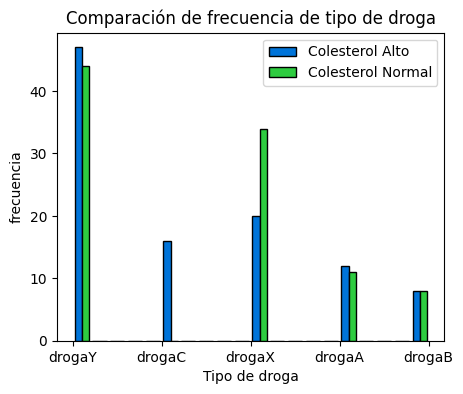

In [ ]:
plt.figure(figsize=(5, 4))

x=[data_ori[data_ori['Colesterol']=='ALTO']['Droga'], data_ori[data_ori['Colesterol']=='NORMAL']['Droga']]

n, bins, patches=plt.hist(x, bins=20, density = False, histtype = "bar", color=['#0074D9', '#2ECC40'], edgecolor = 'Black', label=['Colesterol Alto', 'Colesterol Normal'])
plt.legend(prop={'size': 10})

plt.title('Comparación de frecuencia de tipo de droga')
plt.ylabel('frecuencia')
plt.xlabel('Tipo de droga')


plt.show()

Podemos ver que toda la gente que usa la droga C posee colesterol alto, mientras que la gente que usa la droga X en su mayoría poseen colesterol normal. Las demás drogas están parejas.

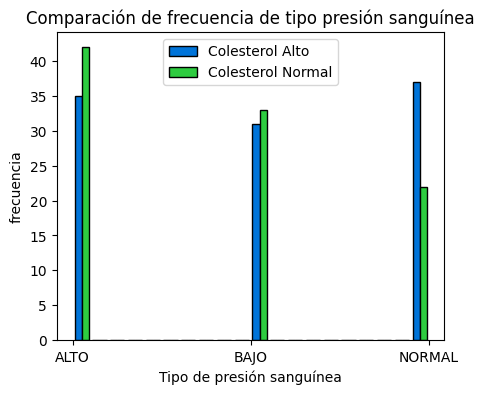

In [ ]:
plt.figure(figsize=(5, 4))

x=[data_ori[data_ori['Colesterol']=='ALTO']['PS'], data_ori[data_ori['Colesterol']=='NORMAL']['PS']]

n, bins, patches=plt.hist(x, bins=20, density = False, histtype = "bar", color=['#0074D9', '#2ECC40'], edgecolor = 'Black', label=['Colesterol Alto', 'Colesterol Normal'])
plt.legend(prop={'size': 10})

plt.title('Comparación de frecuencia de tipo presión sanguínea')
plt.ylabel('frecuencia')
plt.xlabel('Tipo de presión sanguínea')

plt.show()

Podemos ver que la gente con presión sanguínea normal tiene, en su mayoría, colesterol alto, mientras que las otras dos tienen más personas con colesterol normal, lo cuál puede ser atípico y deja ver que la gente con presión sanguínea normal probablemente posea problemas en otras características.

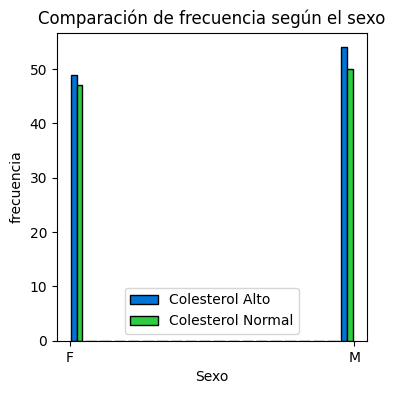

In [ ]:
plt.figure(figsize=(4, 4))

x=[data_ori[data_ori['Colesterol']=='ALTO']['Sexo'], data_ori[data_ori['Colesterol']=='NORMAL']['Sexo']]

n, bins, patches=plt.hist(x, bins=20, density = False, histtype = "bar", color=['#0074D9', '#2ECC40'], edgecolor = 'Black', label=['Colesterol Alto', 'Colesterol Normal'])
plt.legend(prop={'size': 10})

plt.title('Comparación de frecuencia según el sexo')
plt.ylabel('frecuencia')
plt.xlabel('Sexo')

plt.show()

Vemos que la cantidad de gente con colesterol normal o alto es balanceada tanto en hombres como mujeres.

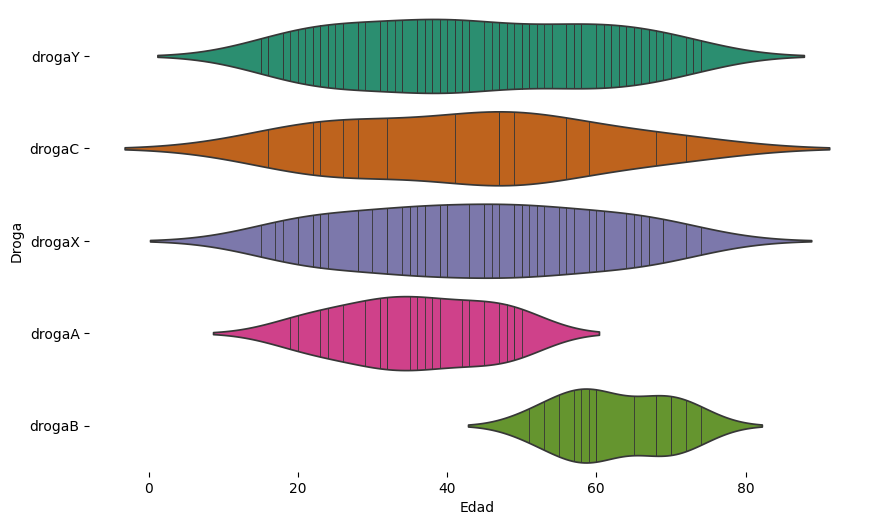

In [ ]:
figsize = (10, 1.2 * len(data_ori['Droga'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_ori, x='Edad', y='Droga', inner='stick', palette='Dark2', hue='Droga')
sns.despine(top=True, right=True, bottom=True, left=True)

Vemos que las drogas se distribuyen normalmente en las edades, excepto con la droga B, que fue usada en su mayoría con gente de mayor edad, lo que puede llevar a algún sesgo.

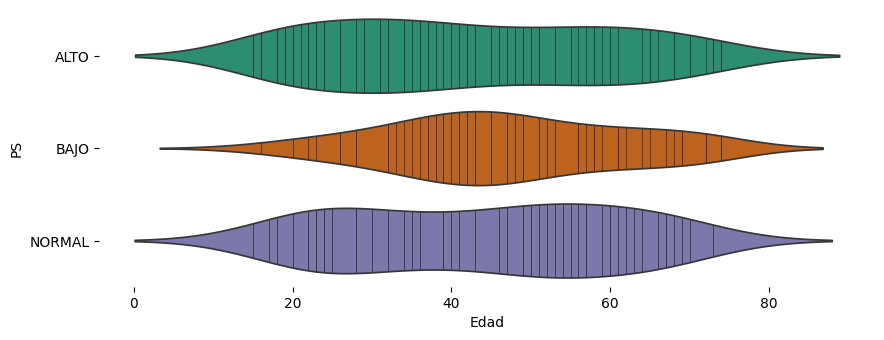

In [ ]:
figsize = (10, 1.2 * len(data_ori['PS'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_ori, x='Edad', y='PS', inner='stick', palette='Dark2', hue='PS')
sns.despine(top=True, right=True, bottom=True, left=True)

Vemos que la mayor cantidad de personas con baja presión sanguínea está en los 40 años. mientras que alto está en los 20's, y Normal entre los 20´s y los 40´s.

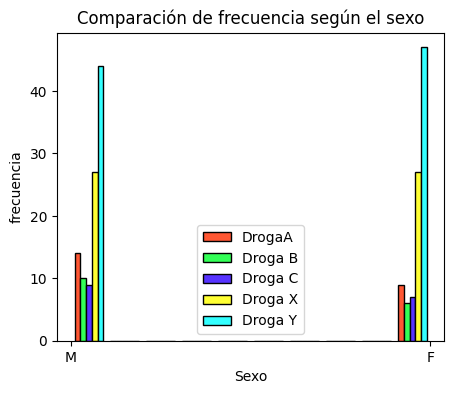

In [ ]:
plt.figure(figsize=(5, 4))

x=[data_ori[data_ori['Droga']=='drogaA']['Sexo'], data_ori[data_ori['Droga']=='drogaB']['Sexo'], data_ori[data_ori['Droga']=='drogaC']['Sexo'], data_ori[data_ori['Droga']=='drogaX']['Sexo'], data_ori[data_ori['Droga']=='drogaY']['Sexo']]

n, bins, patches=plt.hist(x, bins=10, density = False, histtype = "bar", color=['#FF5733', '#33FF57', '#5733FF', '#FFFF33', '#33FFFF'], edgecolor = 'Black', label=['DrogaA', 'Droga B', 'Droga C', 'Droga X', 'Droga Y'])
plt.legend(prop={'size': 10})

plt.title('Comparación de frecuencia según el sexo')
plt.ylabel('frecuencia')
plt.xlabel('Sexo')

plt.show()

Podemos ver que La droga más usada en ambos géneros fue la Y, seguida de la X.

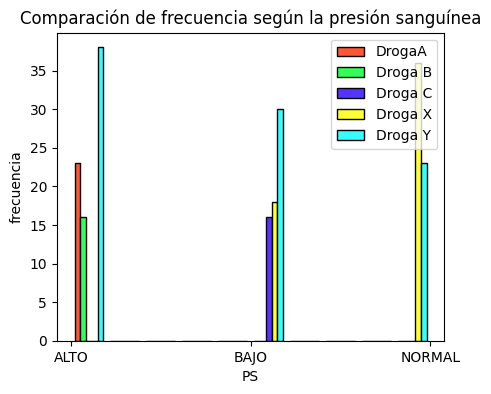

In [ ]:
plt.figure(figsize=(5, 4))

x=[data_ori[data_ori['Droga']=='drogaA']['PS'], data_ori[data_ori['Droga']=='drogaB']['PS'], data_ori[data_ori['Droga']=='drogaC']['PS'], data_ori[data_ori['Droga']=='drogaX']['PS'], data_ori[data_ori['Droga']=='drogaY']['PS']]

n, bins, patches=plt.hist(x, bins=10, density = False, histtype = "bar", color=['#FF5733', '#33FF57', '#5733FF', '#FFFF33', '#33FFFF'], edgecolor = 'Black', label=['DrogaA', 'Droga B', 'Droga C', 'Droga X', 'Droga Y'])
plt.legend(prop={'size': 10})

plt.title('Comparación de frecuencia según la presión sanguínea')
plt.ylabel('frecuencia')
plt.xlabel('PS')

plt.show()

Vemos que la droga Y predomina en la Presión Sanguínea Alta y Baja, mientras que se usó más la X en gente con Presón Sanguínea Normal.

## **Modelos de clasificación**

Previo al uso de cualquier modelo, dividimos los datos en train y test con su debida estandarización. Además, probaremos que el dataset es consistente

In [ ]:
X = data.drop(['Colesterol'],axis=1)
y = data['Colesterol']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1234, shuffle=True)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
X_train_sc = sm.add_constant(X_train, prepend=True)
X_test_sc = sm.add_constant(X_test, prepend=True)

In [ ]:
print(X_train_sc.shape, X_test_sc.shape, y_train.shape, y_test.shape)

(140, 14) (60, 14) (140,) (60,)


Probaremos la consistencia con una regresión logística

In [ ]:
logreg = LogisticRegression(max_iter=100000)
logreg.fit(X_train_sc, y_train)
y_pred = logreg.predict(X_train_sc)


logreg = LogisticRegression(max_iter=100000)
logreg.fit(X_test_sc,y_test)
y_pred2 = logreg.predict(X_test_sc)

In [ ]:
print('Métricas del train')
print("Accuracy:", accuracy_score(y_train, y_pred))
print("Precision:", precision_score(y_train,y_pred))
print("Recall:", recall_score(y_train, y_pred), '\n')

print('Métricas del test')
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))
print("Recall:", recall_score(y_test, y_pred2))

Métricas del train
Accuracy: 0.6642857142857143
Precision: 0.6901408450704225
Recall: 0.6621621621621622 

Métricas del test
Accuracy: 0.7
Precision: 0.6896551724137931
Recall: 0.6896551724137931


Como podemos ver, el dataset es consistente, por lo que procedemos con el uso de los modelos

###**Arbol de clasificación**

previo a la creación del modelo final, veamos cuál es la mejor profundidad y el mejor criterio, sumado a la mejor división para cada criterio.

In [ ]:
criterions = ['gini', 'log_loss', 'entropy']

#Usar diferentes hiperparámetros para ver cuál es más preciso
for i in range(2, 20, 2):
  for j in range(2, 20):
    for c in criterions:
      tree_ = DecisionTreeClassifier(max_depth=i, criterion=c, splitter='best', min_samples_split=j)
      tree_.fit(X_train_sc,y_train)
      y_pred_tree = tree_.predict(X_test_sc)
      ac = accuracy_score(y_test,y_pred_tree)
      if ac > 0.71:
        print(f'La profundidad es: {i}, el criterio es: {c} y el min_samples_split es: {j}')
        print(f'La precisión del modelo es: {ac}\n')

La profundidad es: 12, el criterio es: log_loss y el min_samples_split es: 15
La precisión del modelo es: 0.7166666666666667

La profundidad es: 14, el criterio es: log_loss y el min_samples_split es: 6
La precisión del modelo es: 0.7166666666666667

La profundidad es: 14, el criterio es: entropy y el min_samples_split es: 15
La precisión del modelo es: 0.7166666666666667

La profundidad es: 14, el criterio es: log_loss y el min_samples_split es: 16
La precisión del modelo es: 0.7166666666666667



Después del análisis, ponemos la mejor profundidad, el mejor criterio y el mejor numeros de muestras por división. En este caso, la mejor profundidad es de 12, el mejor criterio es entropy y el mejor numero de muestras por división es de 15.

**Creación del modelo**

In [ ]:
tree = DecisionTreeClassifier(max_depth=12, criterion='entropy', splitter='best', min_samples_split=15)
tree.fit(X_train_sc,y_train)
y_pred_tree = tree.predict(X_test_sc)

**Reporte y métricas**

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))

Accuracy: 0.7166666666666667
Precision: 0.7307692307692307
Recall: 0.6551724137931034


Tenemos dos maneras distintas de visualizar el árbol obtenido:

*Forma de texto:*

In [ ]:
print(export_text(tree, feature_names=['Edad', 'Na', 'K', 'Sexo_F', 'Sexo_M', 'PS_ALTO', 'PS_BAJO', 'PS_NORMAL', 'Droga_drogaA', 'Droga_drogaB', 'Droga_drogaC', 'Droga_drogaX', 'Droga_drogaY', 'Colesterol']))

|--- Droga_drogaX <= 0.50
|   |--- Sexo_F <= 0.06
|   |   |--- Sexo_F <= 0.06
|   |   |   |--- Sexo_F <= 0.05
|   |   |   |   |--- Na <= 68.50
|   |   |   |   |   |--- Droga_drogaA <= 0.50
|   |   |   |   |   |   |--- Na <= 61.50
|   |   |   |   |   |   |   |--- Na <= 57.50
|   |   |   |   |   |   |   |   |--- Droga_drogaB <= 0.50
|   |   |   |   |   |   |   |   |   |--- K <= 0.74
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- K >  0.74
|   |   |   |   |   |   |   |   |   |   |--- Sexo_F <= 0.04
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- Sexo_F >  0.04
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Droga_drogaB >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Na >  57.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Na >  61.50
|   |   |   |   |   |   |   |--- cl

Forma Gráfica

<class 'list'>


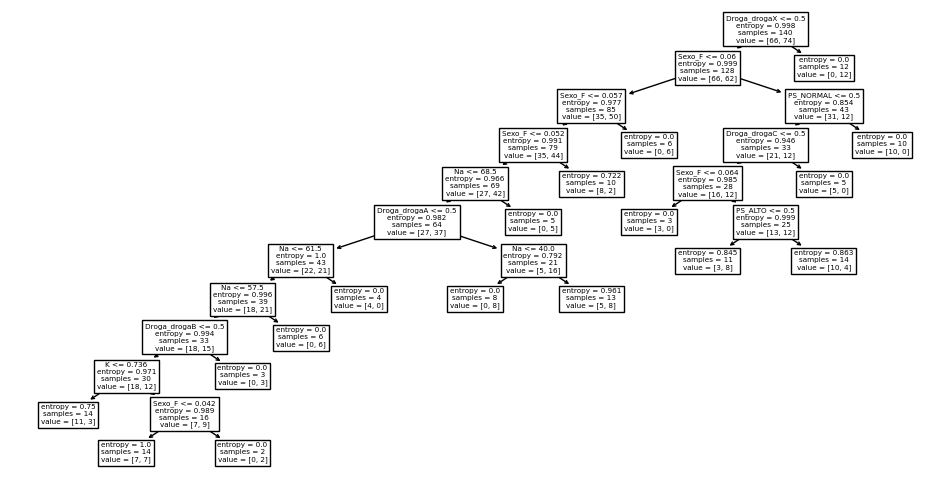

In [ ]:
plt.figure(figsize=(12,6))
tg = plot_tree(tree, feature_names=['Edad', 'Na', 'K', 'Sexo_F', 'Sexo_M', 'PS_ALTO', 'PS_BAJO', 'PS_NORMAL', 'Droga_drogaA', 'Droga_drogaB', 'Droga_drogaC', 'Droga_drogaX', 'Droga_drogaY', 'Colesterol'])
print(type(tg))

In [ ]:
# Obtener la importancia de las características
importances = tree.feature_importances_

# Crear una lista de tuplas (característica, importancia) y ordenarla por importancia
feature_importance_list = [(feature, importance) for feature, importance in zip(X_train.columns, importances)]
feature_importance_list.sort(key=lambda x: x[1], reverse=True)

# Imprimir las características ordenadas por importancia
for feature, importance in feature_importance_list:
  print(f'{feature}: {importance}')

Sexo_F: 0.2938306369583612
Na: 0.24398403115297454
Droga_drogaX: 0.15875526738007592
PS_NORMAL: 0.07455617030431891
Droga_drogaB: 0.04960295818675699
Droga_drogaC: 0.04887295694994775
PS_ALTO: 0.048443515255052444
Droga_drogaA: 0.04395397197324954
K: 0.0380004918392627
Edad: 0.0
Sexo_M: 0.0
PS_BAJO: 0.0
Droga_drogaY: 0.0


###**KNN**

Previo a la creación del modelo final, veamos cuál es el mejor número de vecinos usando vecinos con peso. El peso a asignar será la distancia que tenga con cada vecino (si es menos distancia, menos peso, y si es más distancia, más peso)

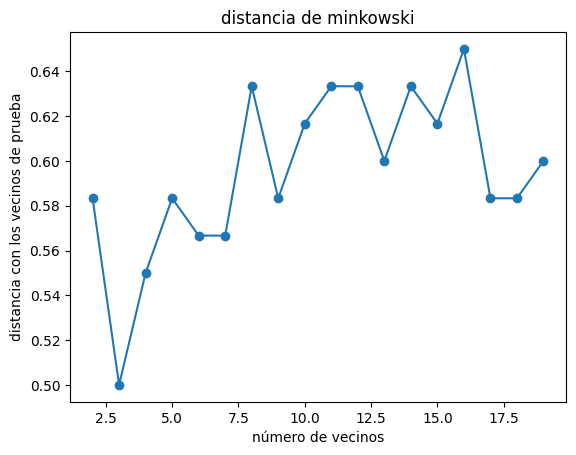

In [ ]:
dist = []

for i in range(2, 20):
  kn_prueba = KNeighborsClassifier(n_neighbors=i, weights='distance')
  kn_prueba.fit(X_train, y_train)
  dist.append(kn_prueba.score(X_test, y_test))

plt.plot(range(2,20), dist, marker='o')
plt.title('distancia de minkowski')
plt.xlabel('número de vecinos')
plt.ylabel('distancia con los vecinos de prueba')
plt.show()

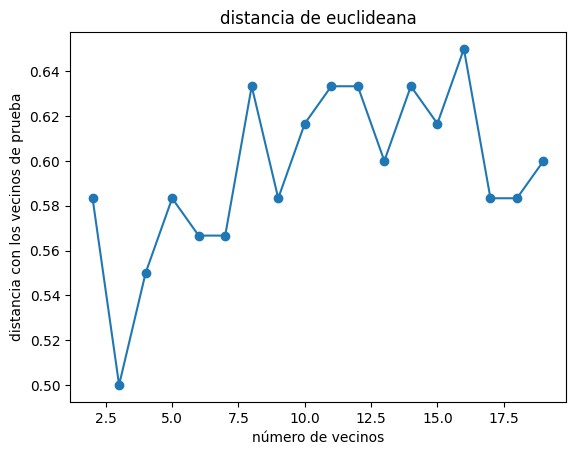

In [ ]:
dist = []

for i in range(2, 20):
  kn_prueba = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='euclidean')
  kn_prueba.fit(X_train, y_train)
  dist.append(kn_prueba.score(X_test, y_test))

plt.plot(range(2,20), dist, marker='o')
plt.title('distancia de euclideana')
plt.xlabel('número de vecinos')
plt.ylabel('distancia con los vecinos de prueba')
plt.show()

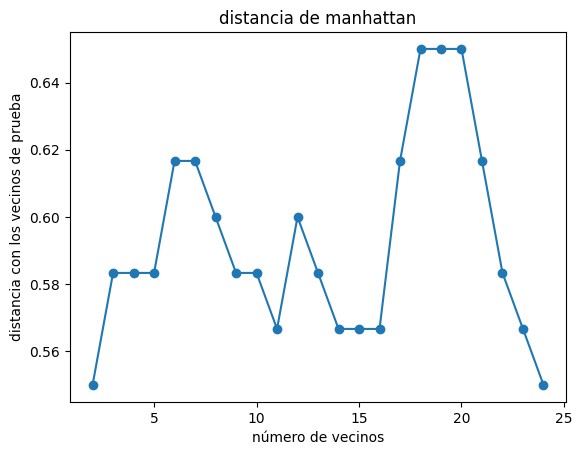

In [ ]:
dist = []

for i in range(2, 25):
  kn_prueba = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='manhattan')
  kn_prueba.fit(X_train, y_train)
  dist.append(kn_prueba.score(X_test, y_test))

plt.plot(range(2,25), dist, marker='o')
plt.title('distancia de manhattan')
plt.xlabel('número de vecinos')
plt.ylabel('distancia con los vecinos de prueba')
plt.show()

Vemos que el mejor número de vecinos está después de entre 15 y 20, por lo que usaremos 19. Se usan distintas métricas de distancia con el fin de saber cuál nos da mejores resultados,y esta resulta ser manhattan.

**Creación del modelo**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=19, weights='distance', metric='manhattan')
knn.fit(X_train_sc, y_train)
y_pred_knn = knn.predict(X_test_sc)

**Reporte y métricas**

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))

Accuracy: 0.65
Precision: 0.6428571428571429
Recall: 0.6206896551724138


###**Naive Bayes**

**Creación del modelo**

In [ ]:
naive = GaussianNB()
naive.fit(X_train_sc, y_train)
y_pred_naive = naive.predict(X_test_sc)

**Reporte y métricas**

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_naive))
print("Precision:", precision_score(y_test, y_pred_naive))
print("Recall:", recall_score(y_test, y_pred_naive))

Accuracy: 0.5833333333333334
Precision: 1.0
Recall: 0.13793103448275862


###**Logit**

**Creación del modelo**

In [ ]:
logreg = LogisticRegression(max_iter=100000)
logreg.fit(X_train_sc,y_train)
y_pred_logit = logreg.predict(X_test_sc)

**Reporte y métricas**

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_logit))
print("Precision:", precision_score(y_test, y_pred_logit))
print("Recall:", recall_score(y_test, y_pred_logit))

Accuracy: 0.55
Precision: 0.5357142857142857
Recall: 0.5172413793103449


###**Redes**

**Creación del modelo**

In [ ]:
model = keras.models.Sequential([keras.layers.Dense(13, activation='relu', input_shape=X_train_sc.shape[1:]),
                                 keras.layers.Dense(26, activation=tf.nn.sigmoid),
                                 keras.layers.Dense(15, activation=tf.nn.sigmoid),
                                 keras.layers.Dense(7, activation=tf.nn.sigmoid),
                                 keras.layers.Dense(1, activation=tf.nn.sigmoid)
                                 ])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Recall', 'Precision'])

In [ ]:
historial=model.fit(X_train_sc, y_train, batch_size=10, epochs=300)
y_pred_c=model.predict(X_test_sc)

Epoch 1/300
14/14 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5214 - recall: 0.8108 - precision: 0.5310
Epoch 2/300
14/14 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.5286 - recall: 1.0000 - precision: 0.5286
Epoch 3/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5286 - recall: 1.0000 - precision: 0.5286
Epoch 4/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5286 - recall: 1.0000 - precision: 0.5286
Epoch 5/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5286 - recall: 1.0000 - precision: 0.5286
Epoch 6/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5286 - recall: 1.0000 - precision: 0.5286
Epoch 7/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5286 - recall: 1.0000 - precision: 0.5286
Epoch 8/300
14/14 [=============================

**Reporte y métricas**

Después de analizar el mejor treshold para la clasificación, se decidió usar 0.36

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_red = [1 if y_pred_c[i][0]>=0.36 else 0 for i in range(len(y_pred_c))]

conf_matrix = confusion_matrix(y_test, y_pred_red)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = fp / (fp + tn)
sensitivity = tp / (tp + fn)

print("Accuracy:", accuracy_score(y_test, y_pred_red))
print("Precision:", precision_score(y_test,y_pred_red))
print("Recall:", recall_score(y_test, y_pred_red), '\n')


Accuracy: 0.5666666666666667
Precision: 0.5306122448979592
Recall: 0.896551724137931 



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                195       
                                                                 
 dense_1 (Dense)             (None, 26)                364       
                                                                 
 dense_2 (Dense)             (None, 15)                405       
                                                                 
 dense_3 (Dense)             (None, 7)                 112       
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 1084 (4.23 KB)
Trainable params: 1084 (4.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


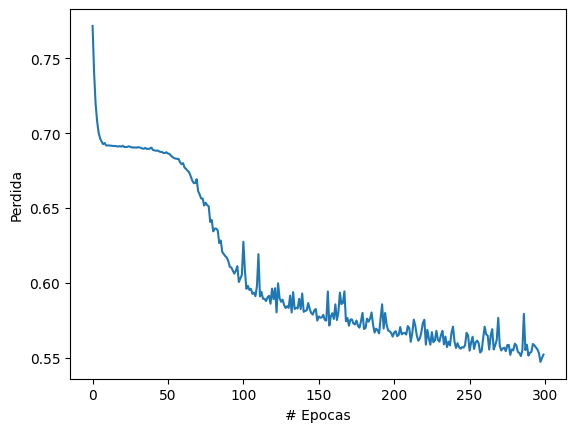

In [ ]:
plt.xlabel("# Epocas")
plt.ylabel("Perdida")
plt.plot(historial.history["loss"])
plt.show()

###**Graficas de verificación y comparación de los resultados y el modelo**

**Matriz de confusión**



*   Verdadero Positivo (TP): Los casos que el modelo ha clasificado correctamente como positivos.
*   Falso Negativo (FN): Los casos positivos que el modelo ha clasificado incorrectamente como negativos.
*   Falso Positivo (FP): Los casos negativos que el modelo ha clasificado incorrectamente como positivos.
*   Verdadero Negativo (TN): Los casos que el modelo ha clasificado correctamente como negativos.

Se desea que los TP y TN sean los más altos.

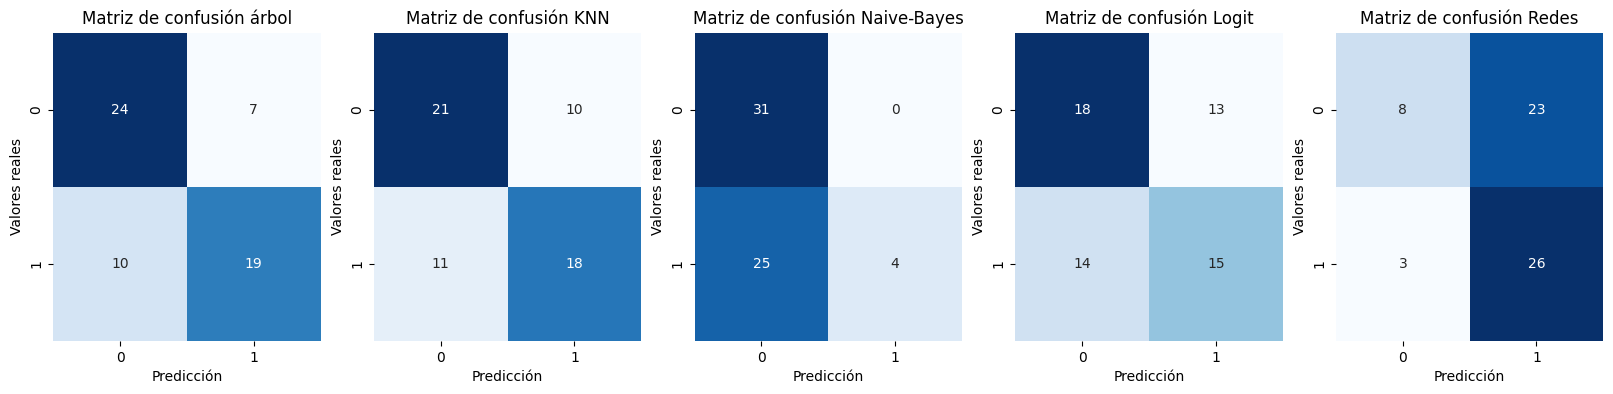

In [ ]:
plt.figure(figsize=(20, 4))

#primera grafica
plt.subplot(1, 5, 1)
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_tree)

# Crear el gráfico de la matriz de confusión
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión árbol')


#segunda grafica
plt.subplot(1, 5, 2)
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_knn)

# Crear el gráfico de la matriz de confusión
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión KNN')


#tercera grafica
plt.subplot(1, 5, 3)
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_naive)

# Crear el gráfico de la matriz de confusión
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión Naive-Bayes')

#cuarta grafica
plt.subplot(1, 5, 4)
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_logit)

# Crear el gráfico de la matriz de confusión
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión Logit')



#quinta grafica
plt.subplot(1, 5, 5)
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_red)

# Crear el gráfico de la matriz de confusión
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión Redes')


plt.show()

**Curva ROC**

La curva ROC representa la tasa de verdaderos positivos en el eje y y la tasa de falsos positivos en el eje x para diferentes umbrales de clasificación.

Nos dice que tan bueno es el modelo para distinguir entre dos clases.

* Sensibilidad (recall): Proporción de identificados correctamente con 1. $$sensibilidad=\frac{TP}{TP+FN}$$
* Especificidad: Proporción de identificados correctamente con 0. $$especificidad=\frac{TN}{TN+FP}$$

La curva ROC es la gráfica que relaciona 1-especificidad y la sensibilidad.

$AUC$ es el área bajo la curva ROC y nos dice el porcentaje para distinguir entre clases. Nunca se debe de aproximar a $0.5$.

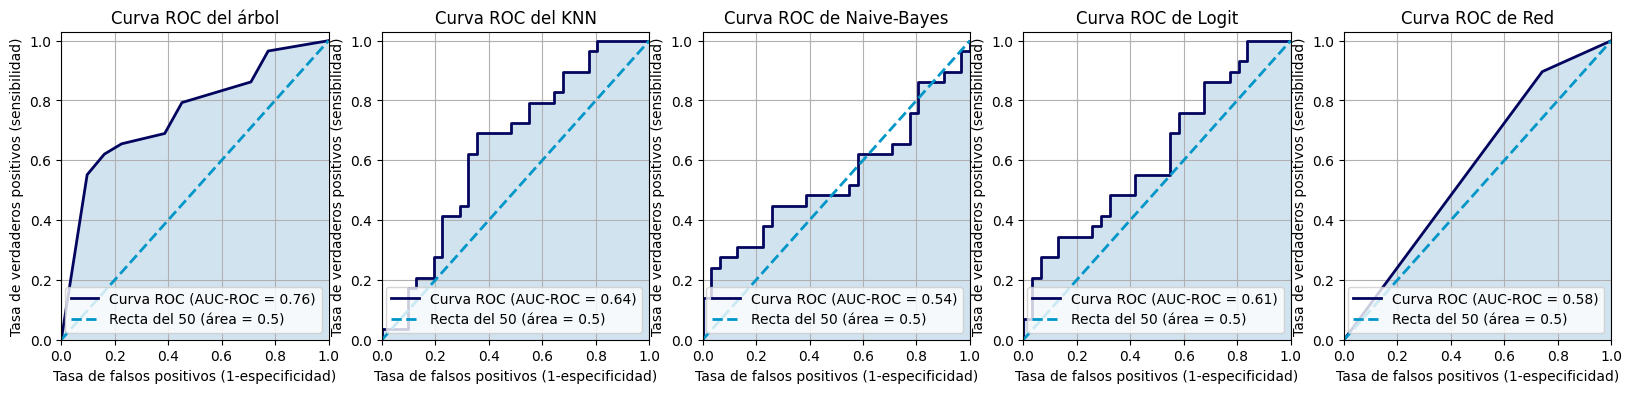

In [ ]:
plt.figure(figsize=(20, 4))

#primera grafica
plt.subplot(1, 5, 1)
# Obtener las probabilidades de predicción para la clase positiva
y_scores = tree.predict_proba(X_test_sc)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='#03045e', lw=2, label='Curva ROC (AUC-ROC = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, alpha=0.2)
plt.plot([0, 1], [0, 1], color='#0096c7', lw=2, linestyle='--', label='Recta del 50 (área = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.03])
plt.xlabel('Tasa de falsos positivos (1-especificidad)')
plt.ylabel('Tasa de verdaderos positivos (sensibilidad)')
plt.title('Curva ROC del árbol')
plt.grid(True)
plt.legend(loc="lower right")


#segunda grafica
plt.subplot(1, 5, 2)
# Obtener las probabilidades de predicción para la clase positiva
y_scores = knn.predict_proba(X_test_sc)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='#03045e', lw=2, label='Curva ROC (AUC-ROC = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, alpha=0.2)
plt.plot([0, 1], [0, 1], color='#0096c7', lw=2, linestyle='--', label='Recta del 50 (área = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.03])
plt.xlabel('Tasa de falsos positivos (1-especificidad)')
plt.ylabel('Tasa de verdaderos positivos (sensibilidad)')
plt.title('Curva ROC del KNN')
plt.grid(True)
plt.legend(loc="lower right")


#tercera grafica
plt.subplot(1, 5, 3)
# Obtener las probabilidades de predicción para la clase positiva
y_scores = naive.predict_proba(X_test_sc)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='#03045e', lw=2, label='Curva ROC (AUC-ROC = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, alpha=0.2)
plt.plot([0, 1], [0, 1], color='#0096c7', lw=2, linestyle='--', label='Recta del 50 (área = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.03])
plt.xlabel('Tasa de falsos positivos (1-especificidad)')
plt.ylabel('Tasa de verdaderos positivos (sensibilidad)')
plt.title('Curva ROC de Naive-Bayes')
plt.grid(True)
plt.legend(loc="lower right")


#cuarta grafica
plt.subplot(1, 5, 4)
# Obtener las probabilidades de predicción para la clase positiva
y_scores = logreg.predict_proba(X_test_sc)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='#03045e', lw=2, label='Curva ROC (AUC-ROC = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, alpha=0.2)
plt.plot([0, 1], [0, 1], color='#0096c7', lw=2, linestyle='--', label='Recta del 50 (área = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.03])
plt.xlabel('Tasa de falsos positivos (1-especificidad)')
plt.ylabel('Tasa de verdaderos positivos (sensibilidad)')
plt.title('Curva ROC de Logit')
plt.grid(True)
plt.legend(loc="lower right")



#quinta grafica
plt.subplot(1, 5, 5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_red)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='#03045e', lw=2, label='Curva ROC (AUC-ROC = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, alpha=0.2)
plt.plot([0, 1], [0, 1], color='#0096c7', lw=2, linestyle='--', label='Recta del 50 (área = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.03])
plt.xlabel('Tasa de falsos positivos (1-especificidad)')
plt.ylabel('Tasa de verdaderos positivos (sensibilidad)')
plt.title('Curva ROC de Red')
plt.grid(True)
plt.legend(loc="lower right")


plt.show()

**$F_{\beta}$ score**

$$F_\beta = (1 + \beta^{2}) \cdot \frac{precision \times recall}{\left(\beta^{2} \cdot precision\right) + recall}$$

$\beta$ es un parámetro que controla la relación de la precisión con el recall.

Un valor de $\beta>1$ da más peso a la precisión, si $F_{\beta} \xrightarrow{\beta\rightarrow\infty}precision$.

Un valor de $\beta<1$ da más peso al recall.

Un valor de $\beta = 1$ da el mismo peso.

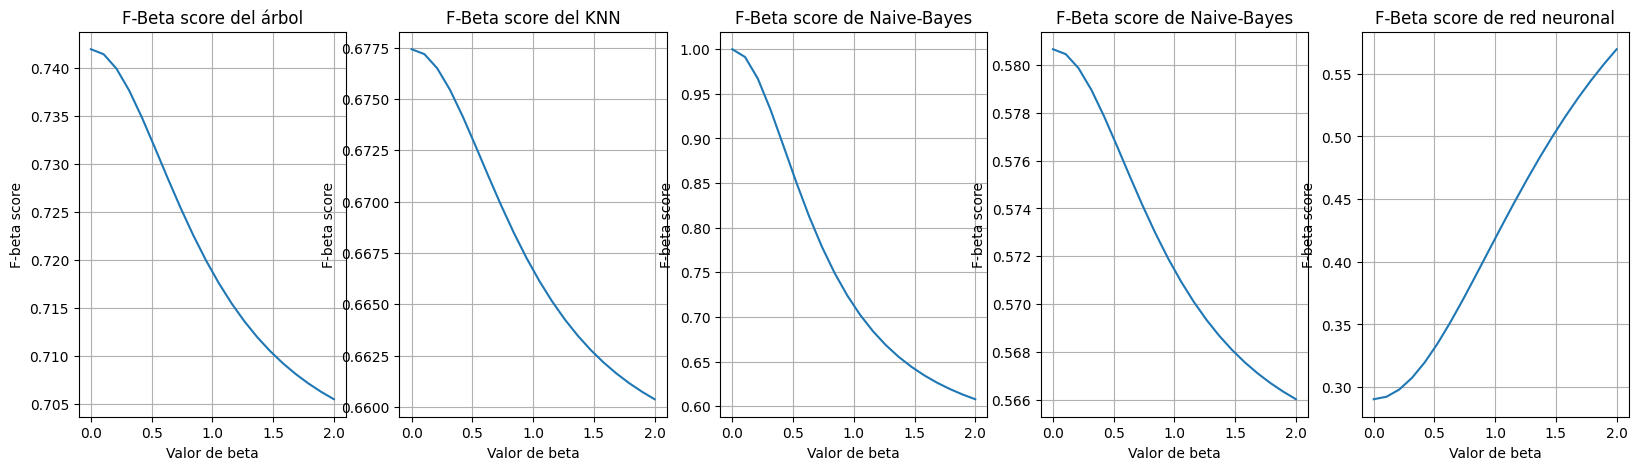

In [ ]:
# Valores de beta
betas = np.linspace(0, 2, 20)


plt.figure(figsize=(20, 5))
#primera grafica
plt.subplot(1, 5, 1)

#Matriz de confusión
mc = confusion_matrix(y_test, y_pred_tree)

# Precisión y recall
precision = mc[0][0]/(mc[0][0] + mc[0][1])
recall = mc[0][0]/(mc[0][0] + mc[1][0])

# Calcular el F-beta score para cada valor de beta
f_beta_scores = [(1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall) for beta in betas]

# Graficar el F-beta score en función de beta
plt.plot(betas, f_beta_scores)
plt.xlabel('Valor de beta')
plt.ylabel('F-beta score')
plt.title(f'F-Beta score del árbol')
plt.grid(True)


#segunda grafica
plt.subplot(1, 5, 2)

#Matriz de confusión
mc = confusion_matrix(y_test, y_pred_knn)

# Precisión y recall
precision = mc[0][0]/(mc[0][0] + mc[0][1])
recall = mc[0][0]/(mc[0][0] + mc[1][0])

# Calcular el F-beta score para cada valor de beta
f_beta_scores = [(1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall) for beta in betas]

# Graficar el F-beta score en función de beta
plt.plot(betas, f_beta_scores)
plt.xlabel('Valor de beta')
plt.ylabel('F-beta score')
plt.title(f'F-Beta score del KNN')
plt.grid(True)


#tercera grafica
plt.subplot(1, 5, 3)

#Matriz de confusión
mc = confusion_matrix(y_test, y_pred_naive)

# Precisión y recall
precision = mc[0][0]/(mc[0][0] + mc[0][1])
recall = mc[0][0]/(mc[0][0] + mc[1][0])

# Calcular el F-beta score para cada valor de beta
f_beta_scores = [(1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall) for beta in betas]

# Graficar el F-beta score en función de beta
plt.plot(betas, f_beta_scores)
plt.xlabel('Valor de beta')
plt.ylabel('F-beta score')
plt.title(f'F-Beta score de Naive-Bayes')
plt.grid(True)

#cuarta grafica
plt.subplot(1, 5, 4)

#Matriz de confusión
mc = confusion_matrix(y_test, y_pred_logit)

# Precisión y recall
precision = mc[0][0]/(mc[0][0] + mc[0][1])
recall = mc[0][0]/(mc[0][0] + mc[1][0])

# Calcular el F-beta score para cada valor de beta
f_beta_scores = [(1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall) for beta in betas]

# Graficar el F-beta score en función de beta
plt.plot(betas, f_beta_scores)
plt.xlabel('Valor de beta')
plt.ylabel('F-beta score')
plt.title(f'F-Beta score de Naive-Bayes')
plt.grid(True)

#quinta grafica
plt.subplot(1, 5, 5)

#Matriz de confusión
mc = confusion_matrix(y_test, y_pred_red)

# Precisión y recall
precision = mc[0][0]/(mc[0][0] + mc[0][1])
recall = mc[0][0]/(mc[0][0] + mc[1][0])

# Calcular el F-beta score para cada valor de beta
f_beta_scores = [(1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall) for beta in betas]

# Graficar el F-beta score en función de beta
plt.plot(betas, f_beta_scores)
plt.xlabel('Valor de beta')
plt.ylabel('F-beta score')
plt.title(f'F-Beta score de red neuronal')
plt.grid(True)

plt.show()

## **Conclusiones**

De los 3 modelos usados, se obtienen los siguientes resultados:

**Tree**
* *Accuracy*: 0.7166666666666667
* *Precisión*: 0.7307692307692307
* *Recall*: 0.6551724137931034
* *AUC*: 0.76

**KNN**
* *Accuracy*: 0.65
* *Precisión*: 0.6428571428571429
* *Recall*: 0.6206896551724138
* *AUC*: 0.64

**Naive-Bayes**
* *Accuracy*: 0.5833333333333334
* *Precisión*: 1.0
* *Recall*: 0.13793103448275862
* *AUC*: 0.54

**Logit**
* *Accuracy*: 0.55
* *Precisión*: 0.5357142857142857
* *Recall*: 0.5172413793103449
* *AUC*: 0.61

**Red Neuronal**
* *Accuracy*: 0.6
* *Precisión*: 0.5531914893617021
* *Recall*: 0.896551724137931
* *AUC*: 0.61

Vemos claramente que el mejor modelo es el Tree.


A continuación veremos la gráfica de los valores reales vs valores predichos

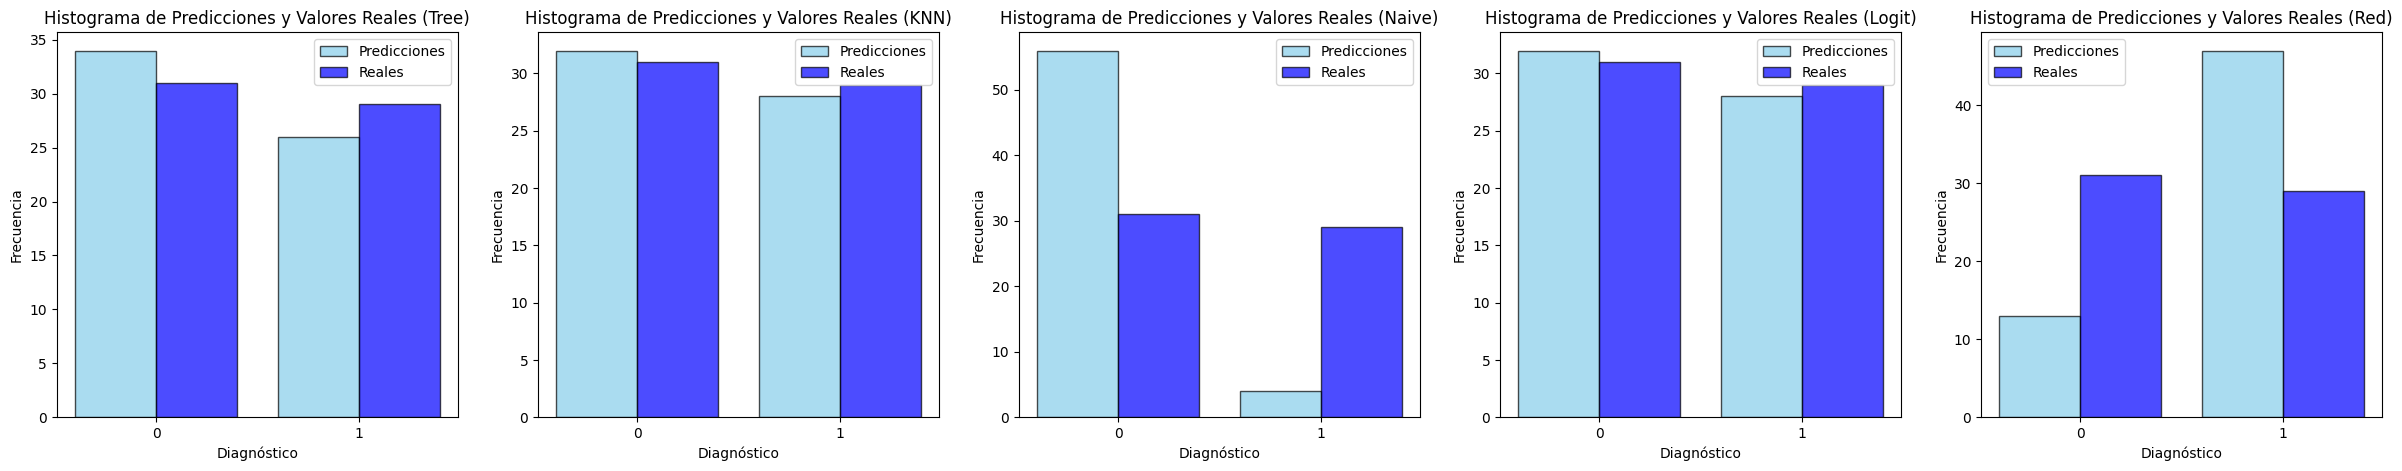

In [ ]:
plt.figure(figsize=(30, 5))

#Tree
plt.subplot(1, 5, 1)
plt.hist([y_pred_tree, y_test], bins=[-0.5, 0.5, 1.5], color=['skyblue', 'blue'], edgecolor='black', alpha=0.7, label=['Predicciones', 'Reales'])
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.title('Histograma de Predicciones y Valores Reales (Tree)')
plt.legend()
plt.xticks([0, 1])

#KNN
plt.subplot(1, 5, 2)
plt.hist([y_pred_knn, y_test], bins=[-0.5, 0.5, 1.5], color=['skyblue', 'blue'], edgecolor='black', alpha=0.7, label=['Predicciones', 'Reales'])
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.title('Histograma de Predicciones y Valores Reales (KNN)')
plt.legend()
plt.xticks([0, 1])

#Naive
plt.subplot(1, 5, 3)
plt.hist([y_pred_naive, y_test], bins=[-0.5, 0.5, 1.5], color=['skyblue', 'blue'], edgecolor='black', alpha=0.7, label=['Predicciones', 'Reales'])
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.title('Histograma de Predicciones y Valores Reales (Naive)')
plt.legend()
plt.xticks([0, 1])

#Logit
plt.subplot(1, 5, 4)
plt.hist([y_pred_logit, y_test], bins=[-0.5, 0.5, 1.5], color=['skyblue', 'blue'], edgecolor='black', alpha=0.7, label=['Predicciones', 'Reales'])
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.title('Histograma de Predicciones y Valores Reales (Logit)')
plt.legend()
plt.xticks([0, 1])

#Red Neuronal
plt.subplot(1, 5, 5)
plt.hist([y_pred_red, y_test], bins=[-0.5, 0.5, 1.5], color=['skyblue', 'blue'], edgecolor='black', alpha=0.7, label=['Predicciones', 'Reales'])
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.title('Histograma de Predicciones y Valores Reales (Red)')
plt.legend()
plt.xticks([0, 1])

plt.show()